<a href="https://colab.research.google.com/github/elainedias16/Data-Mining/blob/main/LeanDL_HPC_Challenge_2025_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobre o Workshop LeanDL-HPC 2025

https://sites.labic.icmc.usp.br/leandl2025/

O LeanDL-HPC 20225 se propõe a explorar e difundir técnicas que permitam **tornar o Deep Learning mais eficiente e escalável no contexto de HPC**, especialmente quando os modelos ultrapassam os recursos típicos dessas infraestruturas. Entre os tópicos em foco estão:

* **Distilação e compressão de modelos**.
* **Quantização**, **pruning**, **cálculos esparços** e **afinamento eficiente de parâmetros**.
* **Otimização de pipelines de inferência** e **deploy consciente de memória/computação**.
* Treinamento e ajuste de LLMs (Modelos de Linguagem de Grande Porte) em sistemas HPC.
* Uso de **arquiteturas leves** como GNNs e CNNs para aplicações científicas.
* Estratégias de **Green AI** e eficiência energética em DL para HPC.



## Este Notebook e o Desafio

Este notebook apresenta **detalhes sobre um dataset** preparado especialmente para um **challenge do workshop LeanDL-HPC 2025**.

O uso deste conjunto de dados é **opcional** e voltado a participantes que desejam trabalhar em uma **tarefa específica** proposta pelo evento.

O desafio envolve **mapear uma amostra teses e dissertações de 2023 para temas estratégicos predefinidos de cada UF**, explorando diferentes níveis de aderência (**BAIXA**, **MÉDIA**, **ALTA**) e, quando possível, apresentando justificativas.

Além de servir como recurso de exploração inicial, o notebook pode apoiar na preparação de soluções para submissão no workshop, alinhadas aos objetivos do LeanDL-HPC 2025.


# LEANDL 2025 — Template de Leitura de Dados e Guia do Desafio

Este notebook apresenta:
- A leitura de **dois arquivos Parquet**:
  - `leandl_oesnpg_dicionario.parquet`: **dicionário de dados** contendo a descrição dos campos.
  - `leandl_oesnpg_dados.parquet`: **dados** contendo amostras de **teses e dissertações de 2023**.
- Um **resumo técnico do desafio**.
- Diretrizes e sugestões de **abordagens de baixo custo** (classificação tradicional, BERT, GNNs, e LLMs até 14B).
- Referências para **medir custo computacional** e **pegada de carbono**.
- Observações importantes sobre a **publicidade** das soluções.



## Desafio: Mapeamento de Teses e Dissertações em Temas Estratégicos da UF

O objetivo é **mapear** cada produção acadêmica (tese/dissertação) para **temas estratégicos predefinidos** do seu estado (UF).

**Observações**:
- Uma mesma produção pode estar associada a **mais de um tema** dentro da mesma UF.
- O mapeamento deve considerar **níveis de aderência**: **BAIXA**, **MÉDIA** e **ALTA**.
- A **justificativa do mapeamento** é **relevante** (explica a decisão) e **bem-vinda**, mas **não é obrigatória**.



## Leitura dos Arquivos Parquet

Abaixo, o código para carregar os dois arquivos:
- `leandl_oesnpg_dicionario.parquet` (dicionário de dados);
- `leandl_oesnpg_dados.parquet` (dados principais).


In [2]:
#baixando os arquivos (instalar o pacote gdown)
# !gdown 12H957uf6mK-1X_ztT9hgFS1slpN2j-Wh
# !gdown 1-QXkqH8HzLcV2JCA4Nm9G5rQhorYKJVe

In [3]:
import pandas as pd

# Ajuste os caminhos se necessário

# path_dict = "../elaine/leandl_oesnpg_dicionario.parquet"
# path_data = "../elaine/leandl_oesnpg_dados.parquet"

path_dict = "../../../../nfs/home/elaine/leandl_oesnpg_dicionario.parquet"
path_data = "../../../../nfs/home/elaine/leandl_oesnpg_dados.parquet"

# Leitura usando pandas (requer pyarrow ou fastparquet)
dicionario_df = pd.read_parquet(path_dict)
dados_df = pd.read_parquet(path_data)

print("Dimensões do dicionário:", dicionario_df.shape)
print("Dimensões dos dados:", dados_df.shape)




Dimensões do dicionário: (25, 2)
Dimensões dos dados: (42046, 25)


In [4]:
dicionario_df

,campo,descricao
0,hash_id,Identificador único (hash) para a produção aca...
1,tema_id,Identificador numérico único do tema estratégico.
2,tema,Nome do tema estratégico definido por uma Unid...
3,palavras_chave,Lista de palavras-chave associadas ao tema est...
4,uf_tema_info,Unidade da Federação (UF) responsável pela def...
5,uf_pesquisador,Unidade da Federação (UF) da instituição de ví...
6,nome_programa,Nome do programa de pós-graduação ao qual a pr...
7,sigla_entidade_ensino,Sigla oficial da instituição de ensino respons...
8,nome_producao,Título completo da tese ou dissertação.
9,nome_subtipo_producao,"Tipo de produção acadêmica, como tese (doutora..."



## Níveis de Aderência (BAIXA, MÉDIA, ALTA)

Atribua **níveis de aderência** que reflitam o grau de correspondência entre o **tema estratégico**
e o **conteúdo** da produção (título, resumo, palavras-chave, etc.).

Sugestão de interpretação:
- **ALTA**: forte coerência semântica e conceitual; termos-chave do tema presentes de forma central no trabalho.
- **MÉDIA**: relação indireta ou parcial; termos aparecem com relevância moderada ou secundária.
- **BAIXA**: relação fraca; termos aparecem superficialmente ou em contextos distintos do tema.

Caso produza **explicações** (ex.: `modelo_explicacao`), procure referenciar **trechos** e **termos** que sustentem a decisão.



## Abordagens de Baixo Custo Recomendadas

### 1) Classificadores tradicionais / BERT (binário: **ALTO** vs **NÃO-ALTO**)
- **Embeddings** de título + resumo (ex.: SBERT, sentence-transformers).
- **Similaridade** com descrições dos temas (cosine similarity).
- **k-NN** ou **regressão logística** (binário) para decidir se é **ALTO** ou **NÃO-ALTO**.
- **Fine-tuning BERT** com amostras rotuladas (quando disponíveis), restringindo o problema a **ALTO** vs **NÃO-ALTO** para reduzir custo.

### 2) LLMs até **14B** de parâmetros (com ou sem fine-tuning)
- **Zero-shot** e **few-shot** com **avaliação sistemática de prompts**.
- **Quantização** (ex.: 4-bit) para reduzir memória/latência.
- **Instruções** claras: definir o papel do modelo, a rubrica de decisão (BAIXA/MÉDIA/ALTA) e pedidos de explicação concisa.
- **Auto-avaliação** de confiança e calibragem (ex.: pedir ao modelo que dê um nível e uma justificativa, depois verificar consistência).

### 3) Estratégias baseadas em grafos
- Modelagem de **grafos de similaridade** entre produções e temas.
- **GNNs** (Graph Neural Networks) para propagar sinais de rótulo e robustecer decisões.
- Uso de **k-NN em embeddings** para construir arestas e explorar **comunidades** temáticas.



## Avaliação

As soluções submetidas devem vir com uma **descrição técnica** (preferencialmente um artigo submtido na main track do workshop LeanDL) cobrindo:
1. **Acurácia do mapeamento** por nível (BAIXA/MÉDIA/ALTA) ou na formulação binária (ALTO vs NÃO-ALTO).
2. **Custo computacional**: **tempo** e **memória** consumidos durante inferência/treinamento.
3. (Opcional) **Matriz de confusão** e análises de erro para interpretar decisões.

OBS: quem preferir apresentar em formato de poster, deve submeter apenas um abstract detalhando sua solução e uma cópia do código.

### Medindo Pegada de Carbono
Sugestão: utilizar a biblioteca **codecarbon**.
- Instalação e instruções: https://mlco2.github.io/codecarbon/installation.html



## Observações Finais

- **Origem dos dados**: todas as informações são públicas, obtidas do Portal de Transparência da CAPES e do Observatório da Pós-Graduação da CAPES, com foco em **amostras de teses e dissertações defendidas em 2023**.
- **Publicidade das soluções**: as soluções propostas devem ser **públicas** para garantir a **avaliação** por membros do comitê científico do LeanDL-HPC 2025.


# Considerações Finais para Participação na Challenge do LeanDL-HPC 2025

* **Como artigo regular:** Se você deseja participar da challenge como **artigo regular** da conferência, submeta seu trabalho na **trilha principal (main track)** da conferência, seguindo as diretrizes do sistema de submissão.

* **Como pôster:** Se você deseja participar da challenge no **formato de pôster**, submeta um **documento de até 2 páginas** descrevendo a solução técnica (objetivo, abordagem, arquitetura/modelos, dados, avaliação e limitações).

> **Observação:** A comissão poderá solicitar, para fins de premiação, que um **novo conjunto de teste** seja executado **antes do evento**, de modo a permitir **comparação justa** entre as soluções.


## Solução Proposta

### Criando DataFrame

In [38]:
import numpy as np
import pandas as pd

def to_fset(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return frozenset(x)
    if pd.isna(x):
        return frozenset()
    #return frozenset([x])
    return frozenset(x)

df_temas = (
    dados_df.assign(palavras_chave=dados_df["palavras_chave"].apply(to_fset))
            [["tema_id", "tema", "uf_tema_info", "nome_producao", "palavras_chave", "descricao_palavra_chave","descricao_resumo", "modelo_nivel" ]]
            .drop_duplicates()
            .dropna()
)


df_temas

,tema_id,tema,uf_tema_info,nome_producao,palavras_chave,descricao_palavra_chave,descricao_resumo,modelo_nivel
0,1,Agronegócio e Tecnologias de Informação e Comu...,ACRE,AS TECNOLOGIAS DIGITAIS DA INFORMAÇÃO E COMUNI...,"(financiamento, inteligência artificial, cadei...",TECNOLOGIAS DA INFORMAÇÃO E COMUNICAÇÃO;BASE N...,"A PESQUISA, DESCRITA NO PRESENTE TRABALHO, ENV...",BAIXA
1,1,Agronegócio e Tecnologias de Informação e Comu...,ACRE,O CURRÍCULO INTEGRADO DO INSTITUTO FEDERAL DO ...,"(financiamento, inteligência artificial, cadei...",ENSINO MÉDIO INTEGRADO;ORGANIZAÇÃO CURRICULAR;...,ESTE ESTUDO INVESTIGOU O CURRÍCULO DO ENSINO M...,MEDIA
2,3,Biodiversidade e Biotecnologia,ACRE,TENDÊNCIA TEMPORAL E DISTRIBUIÇÃO ESPACIAL DAS...,"(sociobiodiversidade, turismo de natureza, cad...",EPIDEMIOLOGIA;LEISHMANIA;PRAIS-WINSTEN,"INTRODUÇÃO. AS ANÁLISES NOS BIOMAS: AMAZÔNIA, ...",BAIXA
3,3,Biodiversidade e Biotecnologia,ACRE,MODELAGEM DE BIOMASSA FLORESTAL E CÁLCULO DE C...,"(sociobiodiversidade, turismo de natureza, cad...",GED;SENSORIAMENTO REMOTO;FLORESTA;MAPEAMENTO;B...,DURANTE AS ÚLTIMAS DÉCADAS AS FLORESTAS TROPIC...,MEDIA
4,3,Biodiversidade e Biotecnologia,ACRE,ANÁLISE SOCIOECONÔMICA E AMBIENTAL DA CADEIA P...,"(sociobiodiversidade, turismo de natureza, cad...",BURITI;PRODUTO FLORESTAL NÃO-MADEIEREIRO;COOPE...,O BIOMA AMAZÔNICO OCUPA POSIÇÃO DE DESTAQUE NO...,ALTA
...,...,...,...,...,...,...,...,...
42039,466,Sistemas Agrícolas Sustentáveis,TOCANTINS,AVALIAÇÃO ECOTOXICOLÓGICA DE EFLUENTE DE ABATE...,"(qualidade ambiental, políticas públicas, mobi...",FERTILIZAÇÃO.;INVERTEBRADO DE ÁGUA DOCE;INVERT...,O DESCARTE DE RESÍDUOS EM MATADOUROS É UM DESA...,MEDIA
42040,466,Sistemas Agrícolas Sustentáveis,TOCANTINS,ANÁLISES MORFO-FISIOLÓGICAS DE PLANTAS DE ACRO...,"(qualidade ambiental, políticas públicas, mobi...",MACAÚBA;TOXIDADE;CHIQUIMATO;HERBICIDA;IRGA,AS CULTURAS OLEAGINOSAS SÃO AS MAIS ESTUDADAS ...,BAIXA
42042,467,Transformação Digital,TOCANTINS,DESENVOLVIMENTO DE JOGO EDUCATIVO SOBRE PROPRI...,"(redes colaborativas, cibersegurança, automaçã...",JOGO DE TABULEIRO;PROPRIEDADE INTELECTUAL;TRAN...,TRATA-SE DE UM PROTÓTIPO PARA A CONCEPÇÃO DE U...,BAIXA
42043,467,Transformação Digital,TOCANTINS,DESAFIOS E OPORTUNIDADES DA IMPLEMENTAÇÃO DA I...,"(redes colaborativas, cibersegurança, automaçã...",INOVAÇÃO ABERTA;MARCO LEGAL DE CIÊNCIA;TECNOLO...,A INOVAÇÃO ABERTA (IA) TEM SIDO UTILIZADA COMO...,BAIXA


In [6]:
df_temas['modelo_nivel'].isna().any()
df_temas[df_temas['modelo_nivel'].isna()]


,tema_id,tema,uf_tema_info,nome_producao,palavras_chave,descricao_palavra_chave,descricao_resumo,modelo_nivel


In [7]:
df_temas['nome_producao']


0        AS TECNOLOGIAS DIGITAIS DA INFORMAÇÃO E COMUNI...
1        O CURRÍCULO INTEGRADO DO INSTITUTO FEDERAL DO ...
2        TENDÊNCIA TEMPORAL E DISTRIBUIÇÃO ESPACIAL DAS...
3        MODELAGEM DE BIOMASSA FLORESTAL E CÁLCULO DE C...
4        ANÁLISE SOCIOECONÔMICA E AMBIENTAL DA CADEIA P...
                               ...                        
42039    AVALIAÇÃO ECOTOXICOLÓGICA DE EFLUENTE DE ABATE...
42040    ANÁLISES MORFO-FISIOLÓGICAS DE PLANTAS DE ACRO...
42042    DESENVOLVIMENTO DE JOGO EDUCATIVO SOBRE PROPRI...
42043    DESAFIOS E OPORTUNIDADES DA IMPLEMENTAÇÃO DA I...
42044    ECOSSISTEMAS NA COMUNIDADE ACADÊMICA E EMPRESA...
Name: nome_producao, Length: 32931, dtype: object

## Pré processamento

In [8]:
# import nltk
# nltk.download('punkt')

# !pip install unidecode
# import unidecode

# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('portuguese'))

# from nltk.tokenize import word_tokenize

# from nltk.stem import RSLPStemmer
# nltk.download('rslp')
# nltk.download('punkt_tab')

In [9]:
# # stemming
# def stemming(text):
#   stemmer = nltk.stem.RSLPStemmer() # stemming to portuguese
#   tokens = word_tokenize(text) #get tokens

#   doc_text_stems = [stemmer.stem(i) for i in tokens]
#   return doc_text_stems

# def remove_stop_words(tokens):
#   text = [token for token in tokens if token not in stop_words]
#   return text

# def remove_non_alphanumeric(tokens):
#   text = [token for token in tokens if token.isalnum()]
#   return text


In [10]:
# def preprocessing(text):

#     text = text.lower()
#     text = unidecode.unidecode(text) #remove accents
#     text = stemming(text) #stemming returns a vector of tokens
#     text = remove_stop_words(text)
#     text = remove_non_alphanumeric(text)
#     return ' '.join(text)


In [11]:
# def preprocess_dataset(df, columns):
#   df[columns] = df[columns].astype(str).applymap(preprocessing)
#   return df

In [12]:
#columns_to_preprocess = ["tema", "palavras_chave", "nome_producao", "descricao_palavra_chave", "descricao_resumo"]
# columns_to_preprocess = ["tema", "descricao_resumo" ]

# df_temas = preprocess_dataset(df_temas, columns_to_preprocess)
# df_temas.head()

## Criação dos embeddings

In [13]:
from codecarbon import EmissionsTracker #to calculate CO2 emissions


/home/elainedias16/GIT/Data-Mining/data-mini-1st-homework/lib/python3.10/site-packages/codecarbon/core/gpu.py:4: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


#### Embeddings baseados no modelo GloVe

In [14]:
from sentence_transformers import SentenceTransformer

temas = df_temas['tema'].tolist()
resumos = df_temas['descricao_resumo'].tolist()
titulo = df_temas['nome_producao'].tolist()

/home/elainedias16/GIT/Data-Mining/data-mini-1st-homework/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
model_media_glove = SentenceTransformer('mteb-pt/average_pt_nilc_glove_s1000')

In [16]:
# tracker = EmissionsTracker()
# tracker.start()

emb_temas_media_glove = model_media_glove.encode(temas, show_progress_bar=True)
emb_resumo_media_glove = model_media_glove.encode(resumos, show_progress_bar=True)
emb_titulo_media_glove = model_media_glove.encode(titulo, show_progress_bar=True)

Batches: 100%|██████████| 1030/1030 [00:00<00:00, 1300.57it/s]


#### Embeddings baseados no modelo Word2Vec

In [17]:
model_media_word2vec = SentenceTransformer('mteb-pt/average_pt_nilc_word2vec_skip_s1000')

In [18]:
emb_temas_media_word2vec = model_media_word2vec.encode(temas , show_progress_bar=True)
emb_resumo_media_word2vec = model_media_word2vec.encode(resumos, show_progress_bar=True)
emb_titulo_media_word2vec = model_media_word2vec.encode(titulo, show_progress_bar=True)

Batches: 100%|██████████| 1030/1030 [00:00<00:00, 1307.77it/s]


#### Embeddings baseados em transformers

In [19]:
# MODEL_NAME = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
# MODEL_NAME = 'unicamp-dl/multilingual-MiniLM-L6-v2-pt-msmarco'
MODEL_NAME = 'all-MiniLM-L6-v2'

model_minilm = SentenceTransformer(MODEL_NAME)

emb_temas_minilm = model_minilm.encode(temas, show_progress_bar=True)
emb_resumo_minilm = model_minilm.encode(resumos, show_progress_bar=True)
emb_titulo_minilm = model_minilm.encode(titulo, show_progress_bar=True)

Batches: 100%|██████████| 1030/1030 [00:10<00:00, 98.80it/s] 


### Cálculo Similaridade

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

def calc_cosine_similarity(emb_x, emb_y):
    similarities = []

    for i in range(len(emb_y)):
        sim = cosine_similarity(emb_x[i].reshape(1, -1), emb_y[i].reshape(1, -1))
        similarities.append(sim[0][0])
    return similarities

In [21]:
# Similarities:

# Word2Vec
swv_titulo_tema = calc_cosine_similarity(emb_titulo_media_word2vec, emb_temas_media_word2vec)
swv_resumo_tema = calc_cosine_similarity(emb_resumo_media_word2vec, emb_temas_media_word2vec)

# GloVe
sgl_titulo_tema = calc_cosine_similarity(emb_titulo_media_glove, emb_temas_media_glove)
sgl_resumo_tema = calc_cosine_similarity(emb_resumo_media_glove, emb_temas_media_glove)

# MiniLM
smlm_titulo_tema = calc_cosine_similarity(emb_titulo_minilm, emb_temas_minilm)
smlm_resumo_tema = calc_cosine_similarity(emb_resumo_minilm, emb_temas_minilm)


sim_word2vec = pd.DataFrame({"swv_titulo_tema": swv_titulo_tema, "swv_resumo_tema": swv_resumo_tema})
sim_glove = pd.DataFrame({"sgl_titulo_tema": sgl_titulo_tema, "sgl_resumo_tema": sgl_resumo_tema})
sim_minilm = pd.DataFrame({"smlm_titulo_tema": smlm_titulo_tema, "smlm_resumo_tema": smlm_resumo_tema})

In [58]:
df_temas['modelo_nivel'] = df_temas['modelo_nivel'].replace('MEDIA', 'BAIXA')

df_temas['modelo_nivel'].head()


0    BAIXA
1    BAIXA
2    BAIXA
3    BAIXA
4     ALTA
Name: modelo_nivel, dtype: object

In [73]:
df_temas['modelo_nivel'].value_counts()

modelo_nivel
BAIXA    26800
ALTA      6131
Name: count, dtype: int64

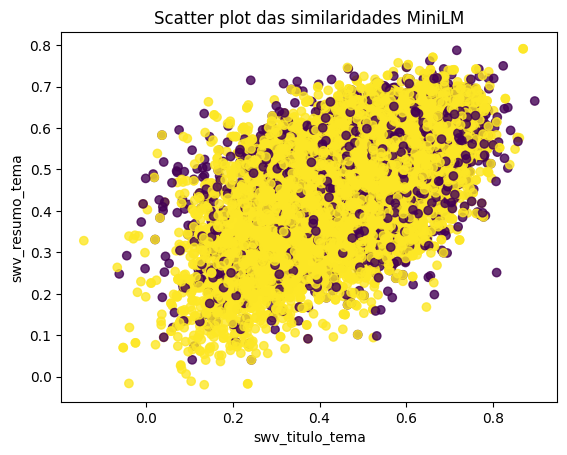

In [72]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


matrix = sim_minilm.values  # converte DataFrame para numpy array
le = LabelEncoder()
y = le.fit_transform(df_temas['modelo_nivel'])

plt.scatter(matrix[:, 0], matrix[:, 1], c=y , alpha=0.8)
plt.xlabel('swv_titulo_tema')
plt.ylabel('swv_resumo_tema')
plt.title('Scatter plot das similaridades MiniLM')
plt.show()

## Criando o classificador

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression


# le = LabelEncoder()
# y = le.fit_transform(df_temas['modelo_nivel'])

knn = KNeighborsClassifier(n_neighbors=3)
logreg = LogisticRegression(random_state=16)


In [75]:
X_wv_train, X_wv_test, y_wv_train, y_wv_test = train_test_split(sim_word2vec, y, test_size=0.2, random_state=42)

X_gl_train, X_gl_test, y_gl_train, y_gl_test = train_test_split(sim_glove, y, test_size=0.2, random_state=42)

X_minilm_train, X_minilm_test, y_minilm_train, y_minilm_test = train_test_split(sim_minilm, y, test_size=0.2, random_state=42)

In [80]:
# Logistic Regression
logreg.fit(X_wv_train, y_wv_train)
y_wv_lg_pred = logreg.predict(X_wv_test)

logreg.fit(X_gl_train, y_gl_train)
y_gl_lg_pred = logreg.predict(X_gl_test)

logreg.fit(X_minilm_train, y_minilm_train)
y_minilm_lg_pred = logreg.predict(X_minilm_test)

In [82]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_wv_lg = accuracy_score(y_wv_test, y_wv_lg_pred)
accuracy_gl_lg = accuracy_score(y_gl_test, y_gl_lg_pred)
accuracy_minilm_lg = accuracy_score(y_minilm_test, y_minilm_lg_pred)

precision_wv_lg = precision_score(y_wv_test, y_wv_lg_pred, average='weighted', zero_division=0)
precision_gl_lg = precision_score(y_gl_test, y_gl_lg_pred, average='weighted', zero_division=0)
precision_minilm_lg = precision_score(y_minilm_test, y_minilm_lg_pred, average='weighted', zero_division=0)

recall_wv_lg = recall_score(y_wv_test, y_wv_lg_pred, average='weighted', zero_division=0)
recall_gl_lg = recall_score(y_gl_test, y_gl_lg_pred, average='weighted', zero_division=0)
recall_minilm_lg = recall_score(y_minilm_test, y_minilm_lg_pred, average='weighted', zero_division=0)

f1_wv_lg = f1_score(y_wv_test, y_wv_lg_pred, average='weighted', zero_division=0)
f1_gl_lg = f1_score(y_gl_test, y_gl_lg_pred, average='weighted', zero_division=0)
f1_minilm_lg = f1_score(y_minilm_test, y_minilm_lg_pred, average='weighted', zero_division=0)

print("Accuracy model based on Word2Vec:", accuracy_wv_lg)
print("Accuracy model based on GloVe:", accuracy_gl_lg)
print("Accuracy model based on MiniLM:", accuracy_minilm_lg)
print("-----------------------------------------------------")

print("Precision model based on Word2Vec:", precision_wv_lg)
print("Precision model based on GloVe:", precision_gl_lg)
print("Precision model based on MiniLM:", precision_minilm_lg)
print("-----------------------------------------------------")

print("Recall model based on Word2Vec:", recall_wv_lg)
print("Recall model based on GloVe:", recall_gl_lg)
print("Recall model based on MiniLM:", recall_minilm_lg)
print("-----------------------------------------------------")

print("F1-score model based on Word2Vec:", f1_wv_lg)
print("F1-score model based on GloVe:", f1_gl_lg)
print("F1-score model based on MiniLM:", f1_minilm_lg)

Accuracy model based on Word2Vec: 0.8041597085167754
Accuracy model based on GloVe: 0.8041597085167754
Accuracy model based on MiniLM: 0.8041597085167754
-----------------------------------------------------
Precision model based on Word2Vec: 0.6466728368017853
Precision model based on GloVe: 0.6466728368017853
Precision model based on MiniLM: 0.6466728368017853
-----------------------------------------------------
Recall model based on Word2Vec: 0.8041597085167754
Recall model based on GloVe: 0.8041597085167754
Recall model based on MiniLM: 0.8041597085167754
-----------------------------------------------------
F1-score model based on Word2Vec: 0.7168687270301851
F1-score model based on GloVe: 0.7168687270301851
F1-score model based on MiniLM: 0.7168687270301851


In [78]:
knn.fit(X_wv_train, y_wv_train)
y_wv_knn_pred = knn.predict(X_wv_test)

knn.fit(X_gl_train, y_gl_train)
y_gl_knn_pred = knn.predict(X_gl_test)

knn.fit(X_minilm_train, y_minilm_train)
y_minilm_knn_pred = knn.predict(X_minilm_test)

In [79]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_wv_knn = accuracy_score(y_wv_test, y_wv_knn_pred)
accuracy_gl_knn = accuracy_score(y_gl_test, y_gl_knn_pred)
accuracy_minilm_knn = accuracy_score(y_minilm_test, y_minilm_knn_pred)

precision_wv_knn = precision_score(y_wv_test, y_wv_knn_pred, average='macro', zero_division=0)
precision_gl_knn = precision_score(y_gl_test, y_gl_knn_pred, average='macro', zero_division=0)
precision_minilm_knn = precision_score(y_minilm_test, y_minilm_knn_pred, average='macro', zero_division=0)

recall_wv_knn = recall_score(y_wv_test, y_wv_knn_pred, average='macro', zero_division=0)
recall_gl_knn = recall_score(y_gl_test, y_gl_knn_pred, average='macro', zero_division=0)
recall_minilm_knn = recall_score(y_minilm_test, y_minilm_knn_pred, average='macro', zero_division=0)

f1_wv_knn = f1_score(y_wv_test, y_wv_knn_pred, average='macro', zero_division=0)
f1_gl_knn = f1_score(y_gl_test, y_gl_knn_pred, average='macro', zero_division=0)
f1_minilm_knn = f1_score(y_minilm_test, y_minilm_knn_pred, average='macro', zero_division=0)

print("Accuracy model based on Word2Vec:", accuracy_wv_knn)
print("Accuracy model based on GloVe:", accuracy_gl_knn)
print("Accuracy model based on MiniLM:", accuracy_minilm_knn)
print("-----------------------------------------------------")

print("Precision model based on Word2Vec:", precision_wv_knn)
print("Precision model based on GloVe:", precision_gl_knn)
print("Precision model based on MiniLM:", precision_minilm_knn)
print("-----------------------------------------------------")

print("Recall model based on Word2Vec:", recall_wv_knn)
print("Recall model based on GloVe:", recall_gl_knn)
print("Recall model based on MiniLM:", recall_minilm_knn)
print("-----------------------------------------------------")

print("F1-score model based on Word2Vec:", f1_wv_knn)
print("F1-score model based on GloVe:", f1_gl_knn)
print("F1-score model based on MiniLM:", f1_minilm_knn)

Accuracy model based on Word2Vec: 0.7498102322756945
Accuracy model based on GloVe: 0.7528465158645817
Accuracy model based on MiniLM: 0.7484439046606953
-----------------------------------------------------
Precision model based on Word2Vec: 0.4963814892604299
Precision model based on GloVe: 0.5007059665618566
Precision model based on MiniLM: 0.49652249836044104
-----------------------------------------------------
Recall model based on Word2Vec: 0.49816650641799587
Recall model based on GloVe: 0.5003475713179758
Recall model based on MiniLM: 0.49819658048361437
-----------------------------------------------------
F1-score model based on Word2Vec: 0.485544953709654
F1-score model based on GloVe: 0.4876537759726882
F1-score model based on MiniLM: 0.48617876556935224


### References

@inproceedings{souza2020bertimbau,
  author    = {F{\'a}bio Souza and
               Rodrigo Nogueira and
               Roberto Lotufo},
  title     = {{BERT}imbau: pretrained {BERT} models for {B}razilian {P}ortuguese},
  booktitle = {9th Brazilian Conference on Intelligent Systems, {BRACIS}, Rio Grande do Sul, Brazil, October 20-23 (to appear)},
  year      = {2020}
}


### TO DO:

* Visualize embeddings
* Transform media -> low in the target ------ Logistic regression is binary  OK
* Avaliation metrics
